<a href="https://colab.research.google.com/github/Allekarthik/AIML_Projects_and_labs/blob/main/AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

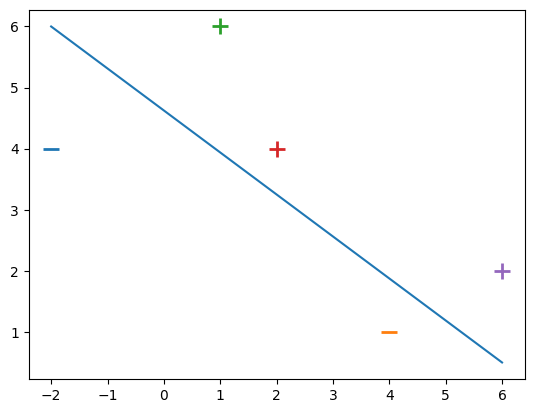

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

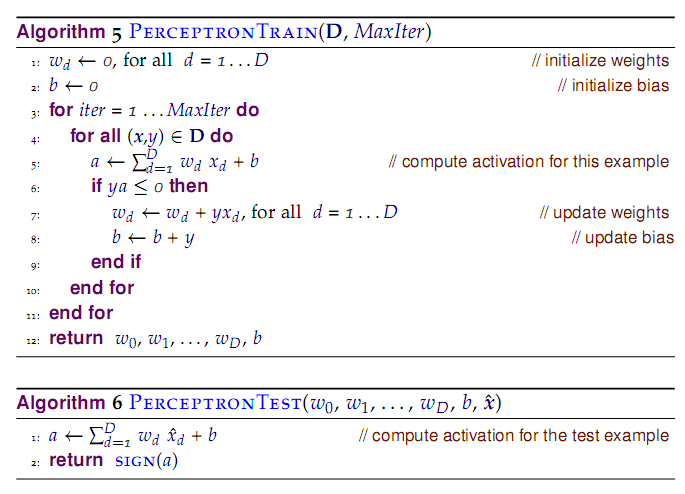

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [5]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

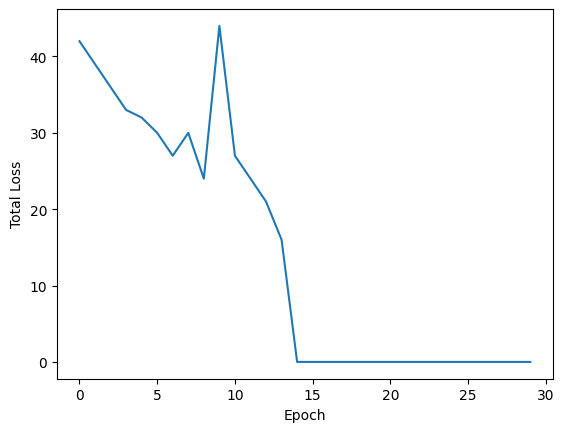

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

NameError: name 'w' is not defined

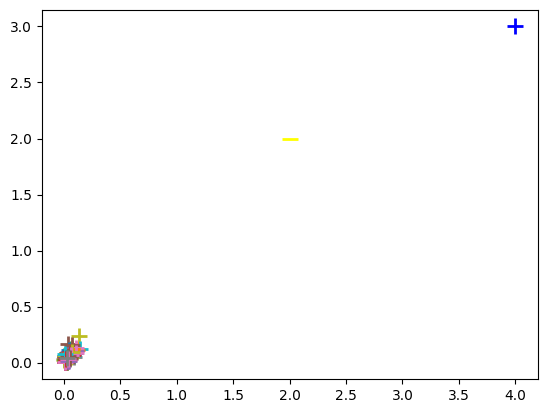

In [6]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

Saving sonar.csv to sonar (1).csv


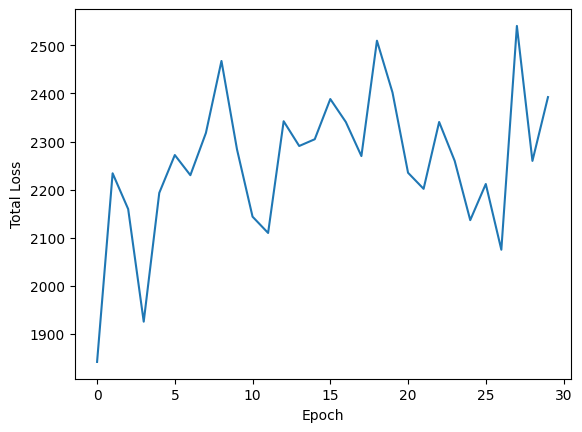

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()
url = list(uploaded.keys())[0]
data = pd.read_csv(url, header=None)

# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.where(y == 0, -1, 1)  # Convert labels from 0/1 to -1/1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train perceptron
w = perceptron_algo_plot(X_train, y_train)

# Plot decision boundary (may need dimensionality reduction for visualization)
# Note: This may not be straightforward for high-dimensional data


Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload and read the dataset
uploaded = files.upload()
url = list(uploaded.keys())[0]
data = pd.read_csv(url, header=None)

# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.where(y == 0, -1, 1)  # Convert labels from 0/1 to -1/1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Perceptron Algorithm with iteration tracking
def perceptron_algo(X, y, learning_rate=0.01, max_iter=1000):
    w = np.zeros(X.shape[1])
    b = 0
    iterations = 0

    for _ in range(max_iter):
        errors = 0
        for i in range(X.shape[0]):
            if y[i] * (np.dot(X[i], w) + b) <= 0:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
                errors += 1
        iterations += 1
        if errors == 0:
            break  # Convergence

    return w, b, iterations

# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0, 10.0]
results = {}

for lr in learning_rates:
    _, _, iters = perceptron_algo(X_train, y_train, learning_rate=lr)
    results[lr] = iters
    print(f"Learning Rate: {lr}, Iterations to Converge: {iters}")



Saving sonar.csv to sonar (2).csv
Learning Rate: 0.001, Iterations to Converge: 2
Learning Rate: 0.01, Iterations to Converge: 2
Learning Rate: 0.1, Iterations to Converge: 2
Learning Rate: 1.0, Iterations to Converge: 2
Learning Rate: 10.0, Iterations to Converge: 2


Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

<ipython-input-9-16e1dcb95a54>:55: RuntimeWarning: divide by zero encountered in scalar divide
  y_min = (-w[0] * x_min - b) / w[1]
<ipython-input-9-16e1dcb95a54>:56: RuntimeWarning: divide by zero encountered in scalar divide
  y_max = (-w[0] * x_max - b) / w[1]


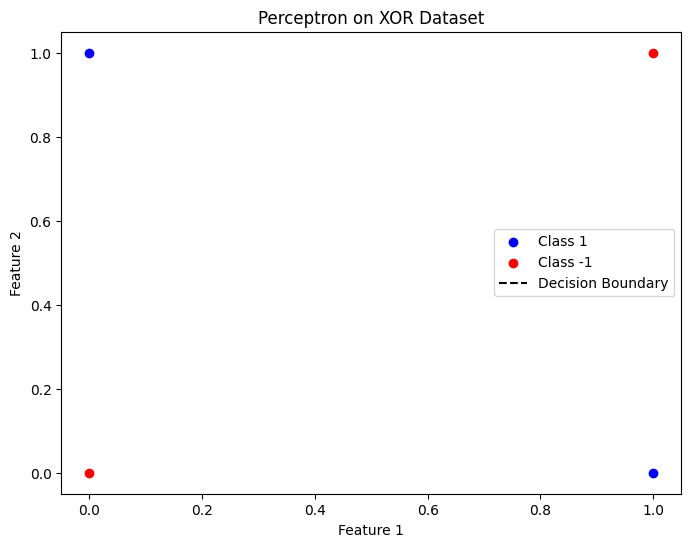

Iterations: 2


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the Perceptron Algorithm
def perceptron_algo(X, y, learning_rate=0.01, max_iter=1000):
    w = np.zeros(X.shape[1])
    b = 0
    iterations = 0

    for _ in range(max_iter):
        errors = 0
        for i in range(X.shape[0]):
            if y[i] * (np.dot(X[i], w) + b) <= 0:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
                errors += 1
        iterations += 1
        if errors == 0:
            break  # Convergence

    return w, b, iterations

# Generate XOR dataset (not linearly separable)
def generate_xor_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])  # XOR labels
    y = np.where(y == 0, -1, 1)  # Convert labels from 0/1 to -1/1
    return X, y

# Generate XOR data
X, y = generate_xor_data()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train perceptron
w, b, iters = perceptron_algo(X_train, y_train, learning_rate=0.01)

# Plot XOR dataset and decision boundary
def plot_xor_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

    # Decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min = (-w[0] * x_min - b) / w[1]
    y_max = (-w[0] * x_max - b) / w[1]
    plt.plot([x_min, x_max], [y_min, y_max], 'k--', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron on XOR Dataset')
    plt.legend()
    plt.show()

# Plot decision boundary
plot_xor_decision_boundary(X, y, w, b)

print(f"Iterations: {iters}")


In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


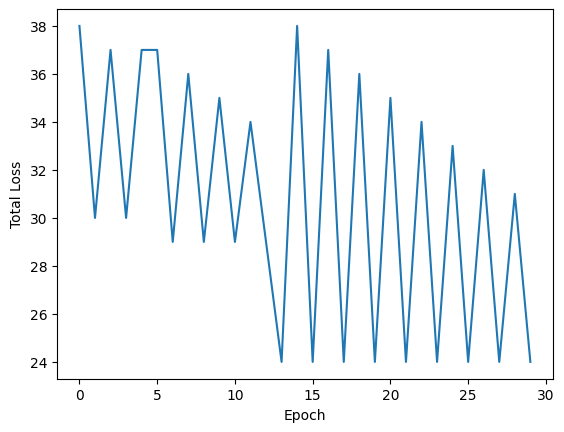

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1)

i)The Perceptron algorithm is capable of learning any linearly separable function. A function is linearly separable if there exists a straight line (or hyperplane in higher dimensions) that separates the data into distinct classes.

To determine if the "AND" function is learnable by the Perceptron, let's check if the dataset is linearly separable.

For the "AND" function, the positive class (𝑦=+1 corresponds to the point
(1,1).The negative class (

y=−1) corresponds to the points

(0,0),

(0,1), and

(1,0).
In 2D space, the dataset can be represented as:

Positive point:

(1,1)
Negative points:

(0,0),

(0,1),

(1,0)
A line can be drawn that separates

(1,1) from the other points. For example, a line like

 ≥1.5 would separate the point

(1,1) from the others. Therefore, this dataset is linearly separable.

Conclusion: Yes, the dataset is learnable by the Perceptron algorithm.


ii)ii) Weight Update Procedure
The Perceptron update rule adjusts weights and bias based on misclassifications. Here's how it works:

Initialize:

Weights
𝑤
0
=
0
w
0
​
 =0,
𝑤
1
=
0
w
1
​
 =0,
𝑤
2
=
0
w
2
​
 =0
Bias
𝑏
0
=
0
b
0
​
 =0
Perceptron Update Rule:
For each training example
(
𝑥
1
,
𝑥
2
)
(x
1
​
 ,x
2
​
 ) with label
𝑦
y:

Compute the prediction:
𝑦
^
=
sign
(
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
𝑏
0
)
y
^
​
 =sign(w
1
​
 x
1
​
 +w
2
​
 x
2
​
 +b
0
​
 )
If
𝑦
^
≠
𝑦
y
^
​


=y, update the weights and bias:
𝑤
𝑖
=
𝑤
𝑖
+
𝜂
⋅
𝑦
⋅
𝑥
𝑖
w
i
​
 =w
i
​
 +η⋅y⋅x
i
​
  for each weight
𝑤
𝑖
w
i
​
  where
𝑖
i is the index of the feature
𝑏
0
=
𝑏
0
+
𝜂
⋅
𝑦
b
0
​
 =b
0
​
 +η⋅y, where
𝜂
η is the learning rate (commonly set to 1 in simple cases)
Iteration Details:
Let's use a learning rate
𝜂
=
1
η=1 and perform updates on each point:

Initial:
𝑤
1
=
0
w
1
​
 =0,
𝑤
2
=
0
w
2
​
 =0,
𝑏
0
=
0
b
0
​
 =0
Example (0, 0, -1):

Prediction:
sign
(
0
⋅
0
+
0
⋅
0
+
0
)
=
sign
(
0
)
=
0
sign(0⋅0+0⋅0+0)=sign(0)=0 (not classified correctly)
Update:
𝑤
1
=
0
+
1
⋅
(
−
1
)
⋅
0
=
0
w
1
​
 =0+1⋅(−1)⋅0=0
𝑤
2
=
0
+
1
⋅
(
−
1
)
⋅
0
=
0
w
2
​
 =0+1⋅(−1)⋅0=0
𝑏
0
=
0
+
1
⋅
(
−
1
)
=
−
1
b
0
​
 =0+1⋅(−1)=−1
Example (0, 1, -1):

Prediction:
sign
(
0
⋅
0
+
0
⋅
1
−
1
)
=
sign
(
−
1
)
=
−
1
sign(0⋅0+0⋅1−1)=sign(−1)=−1 (correctly classified)
No update needed
Example (1, 0, -1):

Prediction:
sign
(
0
⋅
1
+
0
⋅
0
−
1
)
=
sign
(
−
1
)
=
−
1
sign(0⋅1+0⋅0−1)=sign(−1)=−1 (correctly classified)
No update needed
Example (1, 1, +1):

Prediction:
sign
(
0
⋅
1
+
0
⋅
1
−
1
)
=
sign
(
−
1
)
=
−
1
sign(0⋅1+0⋅1−1)=sign(−1)=−1 (incorrectly classified)
Update:
𝑤
1
=
0
+
1
⋅
1
⋅
1
=
1
w
1
​
 =0+1⋅1⋅1=1
𝑤
2
=
0
+
1
⋅
1
⋅
1
=
1
w
2
​
 =0+1⋅1⋅1=1
𝑏
0
=
−
1
+
1
⋅
1
=
0
b
0
​
 =−1+1⋅1=0
After this update, the weights are
𝑤
1
=
1
w
1
​
 =1,
𝑤
2
=
1
w
2
​
 =1, and
𝑏
0
=
0
b
0
​
 =0.

2)
Learnable Functions
1. Linearly Separable Functions: These are typically functions where the positive and negative examples can be separated by a straight line in 2D space. The linearly separable Boolean functions include:

AND: (0,0) → -1, (0,1) → -1, (1,0) → -1, (1,1) → +1
OR: (0,0) → -1, (0,1) → +1, (1,0) → +1, (1,1) → +1
NAND: (0,0) → +1, (0,1) → +1, (1,0) → +1, (1,1) → -1
NOR: (0,0) → +1, (0,1) → -1, (1,0) → -1, (1,1) → -1
XOR: (0,0) → -1, (0,1) → +1, (1,0) → +1, (1,1) → -1
XNOR: (0,0) → +1, (0,1) → -1, (1,0) → -1, (1,1) → +1
2. Non-Linearly Separable Functions: These functions cannot be separated by a single straight line. There are 6 such functions:

Equality (XOR and XNOR): Functions that output the same result for different input combinations.
More Complex Functions: Functions that do not follow simple linear separability patterns.
Truth Tables for Non-Linearly Separable Functions
Here are the truth tables for the Boolean functions that are not learnable by a Perceptron (non-linearly separable):

XOR Function:
0 0 0
0 1 1
1 0 1
1 1 0

XNOR function
0 0 1
0 1 0
1 0 0
1 1 1